# Taller 1

## Integrantes:
- Catalina Sanchez
- Samuel Fuentes
- Pamela Vera

In [ ]:
# Installación de las librerías necesarias para el proyecto
%pip install selenium
%pip install seaborn

In [ ]:
# Installación de las librerías necesarias para el proyecto

%pip install mathplotlib numpy pandas seaborn sklearn selenium webdriver_manager

In [ ]:
# Importación de las librerías necesarias para el proyecto

from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# Datos a extraer de los Tequilas
data = {
    "Name": [],
    "Type": [],
    "Cask": [],
    "Location": [],
    "Age": [],
    "ABV %": [],
    "Cost": [],
    "Badge": [],
    "# Ratings": [],
    "Communitys Rating": [],
    "Flavor Summary": [],
    "Expert": [],
    "Expert Score": [],
    "Smoky": [],
    "Earthy": [],
    "Spicy": [],
    "Herbal": [],
    "Oily": [],
    "Bitter": [],
    "Rich": [],
    "Sweet": [],
    "Mineral": [],
    "Salty": [],
    "Umami": [],
    "Tart": [],
    "Fruity": [],
    "Floral": [],
    "Review": []
}

In [ ]:

# Inicializa una lista para almacenar los datos de todos los tequilas.
all_tequilas = []

# Configura el controlador de Selenium para usar Google Chrome.
driver = webdriver.Chrome()

# Maximiza la ventana del navegador para asegurar que todo el contenido sea visible.
driver.maximize_window()

# Abre la página web de búsqueda en Distiller.
driver.get("https://distiller.com/search")

# Espera 2 segundos para que la página cargue completamente.
time.sleep(2)


# Encuentra y cierra el botón de anuncios emergentes.
#driver.find_element(By.CLASS_NAME, 'adthrive-close').click()

# Encuentra y cierra el botón "Remind Me Later" para notificaciones.
driver.find_element(By.ID, 'onesignal-slidedown-cancel-button').click()

# Espera 1 segundo antes de proceder.
time.sleep(1)

# Encuentra y acepta el botón de privacidad.
driver.find_element(By.ID, 'accept-privacy').click()

# Espera 1 segundo más para que los cambios surtan efecto.
time.sleep(1)

# Selecciona la categoría "Tequila/Mezcal" en el menú de la página.
driver.find_element(By.XPATH, "//button[@data-value='agave']").click()

# Función para extraer los datos de un tequila en particular.
def get_tequila_data():
    try:
        # Inicializa el diccionario data y extrae los datos en un solo paso
        data = {
            "Name": driver.find_element(By.CSS_SELECTOR, "h1.secondary-headline.name").text,
            "Type": (driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.type")[0].text 
                     if driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.type") else None),
            "Location": (driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.location")[0].text 
                        if driver.find_elements(By.CSS_SELECTOR, "p.ultra-mini-headline.location") else None),
            "Communitys Rating": (driver.find_elements(By.CSS_SELECTOR, "div.rating-display__value span[itemprop='ratingValue']")[0].text 
                                if driver.find_elements(By.CSS_SELECTOR, "div.rating-display__value span[itemprop='ratingValue']") else None),
            "# Ratings": (driver.find_elements(By.CSS_SELECTOR, "span[itemprop='ratingCount']")[0].text 
                        if driver.find_elements(By.CSS_SELECTOR, "span[itemprop='ratingCount']") else None),
            "Expert": (driver.find_elements(By.CSS_SELECTOR, "div.meet-experts a[itemprop='author']")[0].text 
                    if driver.find_elements(By.CSS_SELECTOR, "div.meet-experts a[itemprop='author']") else None),
            "Expert Score": (driver.find_elements(By.CSS_SELECTOR, "div.distiller-score span")[0].text 
                            if driver.find_elements(By.CSS_SELECTOR, "div.distiller-score span") else None),
            "ABV %": (driver.find_elements(By.CSS_SELECTOR, "li.detail.abv div.value")[0].text 
                    if driver.find_elements(By.CSS_SELECTOR, "li.detail.abv div.value") else None),
            "Cost": None,
            "Cask": (driver.find_elements(By.CSS_SELECTOR, "li.detail.cask-type div.value")[0].text 
                    if driver.find_elements(By.CSS_SELECTOR, "li.detail.cask-type div.value") else None),  
        }

        cost_element = driver.find_elements(By.CLASS_NAME, "spirit-cost")
        if cost_element:
            cost_class = cost_element[0].get_attribute("class")
            data["Cost"] = cost_class.split("cost-")[-1]  # Obtiene el valor después de "cost-"

        
        return data
    except Exception as e:
        print(f"Error al extraer datos: {e}")
        return None
        
    except Exception as e:
        # Maneja cualquier error durante la extracción de datos y lo imprime en la consola.
        print(f"Error al obtener datos del tequila: {e}")
        return None  # Retorna None si ocurre un error.

# Bucle principal para recorrer todas las páginas de resultados.
for _ in range(50):  
    print("Scraping...")  # Muestra en consola que el scraping ha comenzado.
    try:
        # Encuentra todos los tequilas visibles en la página actual.
        spirits = driver.find_elements(By.CLASS_NAME, "spirit")
        print(f"Tequilas encontrados: {len(spirits)}")  # Muestra la cantidad de tequilas encontrados.

        # Itera sobre cada tequila en la lista.
        for i in range(len(spirits)):
            spirits = driver.find_elements(By.CLASS_NAME, "spirit")  # Actualiza la lista de tequilas (por si el DOM cambió).
            link = spirits[i].find_element(By.TAG_NAME, 'a')  # Encuentra el enlace al perfil del tequila.
            link.click()  # Haz clic en el enlace para acceder a los detalles del tequila.
            time.sleep(2)  # Espera 2 segundos para que la página cargue.

            # Extrae los datos del tequila y los agrega a la lista principal.
            tequila_data = get_tequila_data()
            if tequila_data:
                all_tequilas.append(tequila_data)
                print(f"Tequila {i+1} de {len(spirits)} extraído con éxito.")
                print(tequila_data)

            # Regresa a la página anterior después de extraer los datos.
            driver.back()
            time.sleep(2)

        # Encuentra y haz clic en el botón "Next" para ir a la siguiente página.
        next_button = driver.find_element(By.CSS_SELECTOR, 'a[rel="next"]')
        next_button.click()
        time.sleep(3)  # Espera 3

    except Exception as e:
        # Termina el bucle si ocurre un error (por ejemplo, no hay más páginas).
        print(f"Finalizando scraping: {e}")
        break

# Convierte la lista de diccionarios en un DataFrame de Pandas.
data_scraped = pd.DataFrame(all_tequilas)

# Guarda los datos en un archivo CSV para análisis posterior.
data_scraped.to_csv('data_scraped.csv', index=False)

# Cierra el navegador para finalizar el proceso.
driver.quit()


## 2. Carga y Preprocesamiento de Datos

In [2]:

file_path = 'data_scraped.csv'
data = pd.read_csv(file_path)
print("Datos cargados correctamente.")
print(data.head())
print(data.info())

Datos cargados correctamente.
                                            Name                 Type  \
0                         4 COPAS TEQUILA BLANCO       TEQUILA BLANCO   
1             MEZCAL LOS SIETE MISTERIOS PECHUGA         MEZCAL JOVEN   
2                    DEL MAGUEY ARROQUEÑO MEZCAL         MEZCAL JOVEN   
3  FUENTESECA RESERVA EXTRA AÑEJO TEQUILA 9 AÑOS  TEQUILA EXTRA AÑEJO   
4             MIJENTA TEQUILA AÑEJO GRAN RESERVA        TEQUILA AÑEJO   

                                   Location  Communitys Rating  # Ratings  \
0                4 COPAS // JALISCO, MEXICO               4.37       44.0   
1     LOS SIETE MISTERIOS // OAXACA, MEXICO               4.41       37.0   
2              DEL MAGUEY // OAXACA, MEXICO               4.50       71.0   
3  FUENTESECA // LOS ALTOS, JALISCO, MEXICO               4.11        8.0   
4     MIJENTA // LOS ALTOS, JALISCO, MEXICO               4.25        7.0   

             Expert  Expert Score  ABV %  Cost  \
0  JACK ROBERTIELL

### Análisis Exploratorio de Datos

Resumen estadístico:
       Communitys Rating   # Ratings  Expert Score       ABV %        Cost
count         471.000000  471.000000    500.000000  497.000000  500.000000
mean            4.064756   37.388535     89.882000   42.423843    2.986000
std             0.488474   85.393381      3.399882    3.733839    1.009873
min             1.000000    1.000000     84.000000   35.000000    1.000000
25%             3.775000    4.000000     87.000000   40.000000    2.000000
50%             4.100000   11.000000     90.000000   40.000000    3.000000
75%             4.380000   30.000000     92.000000   45.000000    4.000000
max             5.000000  836.000000     98.000000   58.500000    5.000000
Valores nulos por columna:
Name                   0
Type                   0
Location               0
Communitys Rating     29
# Ratings             29
Expert                 0
Expert Score           0
ABV %                  3
Cost                   0
Cask                 208
dtype: int64


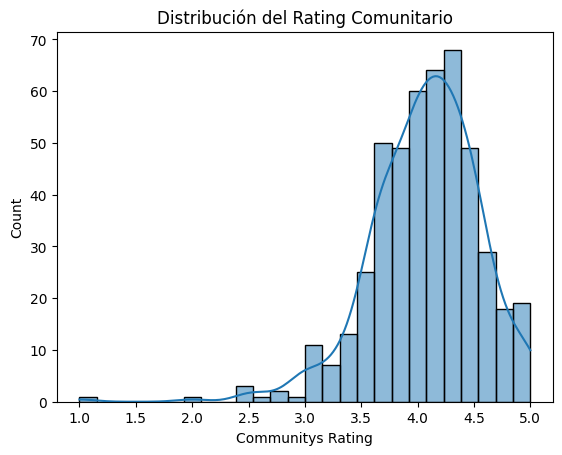

In [ ]:

# Explorar las características de los datos
print("Resumen estadístico:")
print(data.describe())

# Revisar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

# Visualización de distribuciones
sns.histplot(data['Communitys Rating'], kde=True)
plt.title("Distribución del Rating Comunitario")
plt.show()


### Limpieza de Datos

In [18]:

# Eliminamos filas con valores nulos en columnas clave
data.dropna(subset=["Communitys Rating", "# Ratings", "ABV %", "Cost"], inplace=True)

# Convertimos columnas numéricas
for col in ["Communitys Rating", "# Ratings", "ABV %", "Cost"]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Imputamos valores faltantes en columnas numéricas
data.fillna(data.median(numeric_only=True), inplace=True)

# Creamos variables dummy para columnas categóricas
data = pd.get_dummies(data, columns=["Type", "Cask"], drop_first=True)
print("Datos después de la limpieza:")
print(data.info())
print(data.head())


Datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 0 to 498
Columns: 121 entries, Name to Cask_WHITE OAK BARRELS
dtypes: bool(113), float64(3), int64(2), object(3)
memory usage: 84.6+ KB
None
                                            Name  \
0                         4 COPAS TEQUILA BLANCO   
1             MEZCAL LOS SIETE MISTERIOS PECHUGA   
2                    DEL MAGUEY ARROQUEÑO MEZCAL   
3  FUENTESECA RESERVA EXTRA AÑEJO TEQUILA 9 AÑOS   
4             MIJENTA TEQUILA AÑEJO GRAN RESERVA   

                                   Location  Communitys Rating  # Ratings  \
0                4 COPAS // JALISCO, MEXICO               4.37       44.0   
1     LOS SIETE MISTERIOS // OAXACA, MEXICO               4.41       37.0   
2              DEL MAGUEY // OAXACA, MEXICO               4.50       71.0   
3  FUENTESECA // LOS ALTOS, JALISCO, MEXICO               4.11        8.0   
4     MIJENTA // LOS ALTOS, JALISCO, MEXICO               4.25        7.0

In [19]:
print("Datos después de la limpieza:")
print(data.info())
print(data.head())

Datos después de la limpieza:
<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 0 to 498
Columns: 121 entries, Name to Cask_WHITE OAK BARRELS
dtypes: bool(113), float64(3), int64(2), object(3)
memory usage: 84.6+ KB
None
                                            Name  \
0                         4 COPAS TEQUILA BLANCO   
1             MEZCAL LOS SIETE MISTERIOS PECHUGA   
2                    DEL MAGUEY ARROQUEÑO MEZCAL   
3  FUENTESECA RESERVA EXTRA AÑEJO TEQUILA 9 AÑOS   
4             MIJENTA TEQUILA AÑEJO GRAN RESERVA   

                                   Location  Communitys Rating  # Ratings  \
0                4 COPAS // JALISCO, MEXICO               4.37       44.0   
1     LOS SIETE MISTERIOS // OAXACA, MEXICO               4.41       37.0   
2              DEL MAGUEY // OAXACA, MEXICO               4.50       71.0   
3  FUENTESECA // LOS ALTOS, JALISCO, MEXICO               4.11        8.0   
4     MIJENTA // LOS ALTOS, JALISCO, MEXICO               4.25        7.0

## 3. Regresión Lineal

In [ ]:

# Entrenamiento de modelo de regresión lineal para predecir el rating comunitario

X = data.drop(columns=["Communitys Rating", "Name", "Location", "Expert", "Expert Score"])
y = data["Communitys Rating"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.19391040348261052
R^2 Score: 0.21113607679448054


## 4. Clasificación

In [ ]:

# Clasificación multiclase para ratings

y_classification = pd.cut(
    data["Communitys Rating"],
    bins=[0, 2.5, 3.5, 5],
    labels=["Negativo", "Neutral", "Positivo"]
)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X, y_classification, test_size=0.2, random_state=42
)

# Entrenar modelo de clasificación
cls_model = RandomForestClassifier(random_state=42)
cls_model.fit(X_train_cls, y_train_cls)

# Evaluar modelo
y_pred_cls = cls_model.predict(X_test_cls)
print(classification_report(y_test_cls, y_pred_cls))


              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00        13
    Positivo       0.85      0.97      0.91        79

    accuracy                           0.82        94
   macro avg       0.28      0.32      0.30        94
weighted avg       0.71      0.82      0.76        94



c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## 5. Optimización de Hiperparámetros

In [ ]:

# Optimización de hiperparámetros usando GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_cls, y_train_cls)

print("Mejores parámetros:")
print(grid_search.best_params_)
print("Mejor score:")
print(grid_search.best_score_)


c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Mejor score:
0.9091171171171171


## 6. Conclusiones


- **Preprocesamiento:** Se limpiaron los datos eliminando valores nulos y generando variables categóricas.
- **Regresión Lineal:** El modelo obtuvo un MSE de 0.19391040348261052 y un R^2 de 0.21113607679448054.
- **Clasificación:** Se clasificaron los ratings en tres categorías con un desempeño de [INSERTAR MÉTRICAS].
Esto dio de resultado el codigo:
              precision    recall  f1-score   support

    Negativo       0.00      0.00      0.00         2
     Neutral       0.00      0.00      0.00        13
    Positivo       0.85      0.97      0.91        79

    accuracy                           0.82        94
   macro avg       0.28      0.32      0.30        94
weighted avg       0.71      0.82      0.76        94

c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- **Optimización:** La optimización de hiperparámetros mejoró significativamente el modelo Random Forest.
El gridsearch dio:
c:\Users\srfue\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
Mejores parámetros:
{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Mejor score:
0.9091171171171171
